In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import scipy.stats as stats


In [217]:
file = "ad_campaign_performance.csv"

In [218]:
df = pd.read_csv(file)

In [219]:
df.head()

,Campaign_ID,Budget,Duration,Platform,Content_Type,Target_Age,Target_Gender,Region,Clicks,Conversions,CTR,CPC,Conversion_Rate,Success
0,CAMP-XAJI0Y,15895,39,Instagram,Video,35-44,Female,US,48297,2116,303.850267,0.329109,4.381225,1
1,CAMP-6DPBHS,960,8,LinkedIn,Video,45-54,Female,UK,15097,2340,1572.604167,0.063589,15.499768,1
2,CAMP-AHXTHV,38258,54,YouTube,Image,35-44,All,US,8134,2740,21.260913,4.703467,33.685763,1
3,CAMP-3A3ZMF,44832,28,Facebook,Text,25-34,Female,US,21801,4277,48.628212,2.056419,19.618366,1
4,CAMP-8MDD4V,11384,36,Google,Story,18-24,All,UK,16503,1488,144.966620,0.689814,9.016542,1


In [220]:
df.value_counts()

Campaign_ID  Budget  Duration  Platform  Content_Type  Target_Age  Target_Gender  Region   Clicks  Conversions  CTR           CPC       Conversion_Rate  Success
CAMP-00ILU6  39677   34        YouTube   Carousel      45-54       Female         US       36883   3816         92.958137     1.075753  10.346230        1          1
CAMP-OKEP7Y  11753   22        YouTube   Video         35-44       Male           Canada   16245   1556         138.220029    0.723484  9.578332         1          1
CAMP-NZEI3Z  7156    28        YouTube   Text          55+         All            Germany  7796    4912         108.943544    0.917907  63.006670        1          1
CAMP-O04K0L  41448   31        LinkedIn  Text          25-34       Male           Canada   12966   2385         31.282571     3.196668  18.394262        1          1
CAMP-O100VH  36134   38        LinkedIn  Video         35-44       Male           Canada   17381   976          48.101511     2.078937  5.615327         1          1
         

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Campaign_ID      1000 non-null   object 
 1   Budget           1000 non-null   int64  
 2   Duration         1000 non-null   int64  
 3   Platform         1000 non-null   object 
 4   Content_Type     1000 non-null   object 
 5   Target_Age       1000 non-null   object 
 6   Target_Gender    1000 non-null   object 
 7   Region           1000 non-null   object 
 8   Clicks           1000 non-null   int64  
 9   Conversions      1000 non-null   int64  
 10  CTR              1000 non-null   float64
 11  CPC              1000 non-null   float64
 12  Conversion_Rate  1000 non-null   float64
 13  Success          1000 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 109.5+ KB


In [222]:
content_type = df["Content_Type"].value_counts()
print(content_type)

Content_Type
Story       213
Image       210
Carousel    202
Text        200
Video       175
Name: count, dtype: int64


In [223]:
success_count = df['Success'].sum()
failed_count = len(df) - success_count

failed_campaigns = df[df["Success"] == 0]


print(f"Number of successful campaigns: {success_count}")
print(f"Number of failed campaigns: {failed_count}")
print(failed_campaigns)

Number of successful campaigns: 897
Number of failed campaigns: 103
     Campaign_ID  Budget  Duration   Platform Content_Type Target_Age  \
16   CAMP-9T84AZ    5411        57   Facebook        Video        55+   
18   CAMP-Q85JSG   39288         6    YouTube     Carousel        55+   
24   CAMP-PHT0HL   41534        57     Google        Video      25-34   
29   CAMP-3GDPPQ     289        33   Facebook         Text      18-24   
30   CAMP-0Y9DOM   19218        42  Instagram        Video      35-44   
..           ...     ...       ...        ...          ...        ...   
949  CAMP-WWG84D   48613        12   LinkedIn         Text      25-34   
952  CAMP-VFUA9B    4721        36   LinkedIn         Text        55+   
979  CAMP-ORFQLA    4732        49  Instagram         Text      25-34   
985  CAMP-TQYDSH    7661        14    YouTube         Text      45-54   
999  CAMP-CL5EFJ   35340        36    YouTube        Story      18-24   

    Target_Gender  Region  Clicks  Conversions         

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Campaign_ID      1000 non-null   object 
 1   Budget           1000 non-null   int64  
 2   Duration         1000 non-null   int64  
 3   Platform         1000 non-null   object 
 4   Content_Type     1000 non-null   object 
 5   Target_Age       1000 non-null   object 
 6   Target_Gender    1000 non-null   object 
 7   Region           1000 non-null   object 
 8   Clicks           1000 non-null   int64  
 9   Conversions      1000 non-null   int64  
 10  CTR              1000 non-null   float64
 11  CPC              1000 non-null   float64
 12  Conversion_Rate  1000 non-null   float64
 13  Success          1000 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 109.5+ KB


In [225]:
content_type_successful = df.groupby("Content_Type")["Success"].agg(["sum", "count", "mean"])
content_type_successful.columns = ['Successful_Count','Total_Campaigns', 'Success_Rate'] 

content_analysis = content_type_successful.sort_values(by="Success_Rate", ascending=False)
content_analysis

,Successful_Count,Total_Campaigns,Success_Rate
Content_Type,,,
Carousel,190,202,0.940594
Image,191,210,0.909524
Story,191,213,0.896714
Video,153,175,0.874286
Text,172,200,0.860000


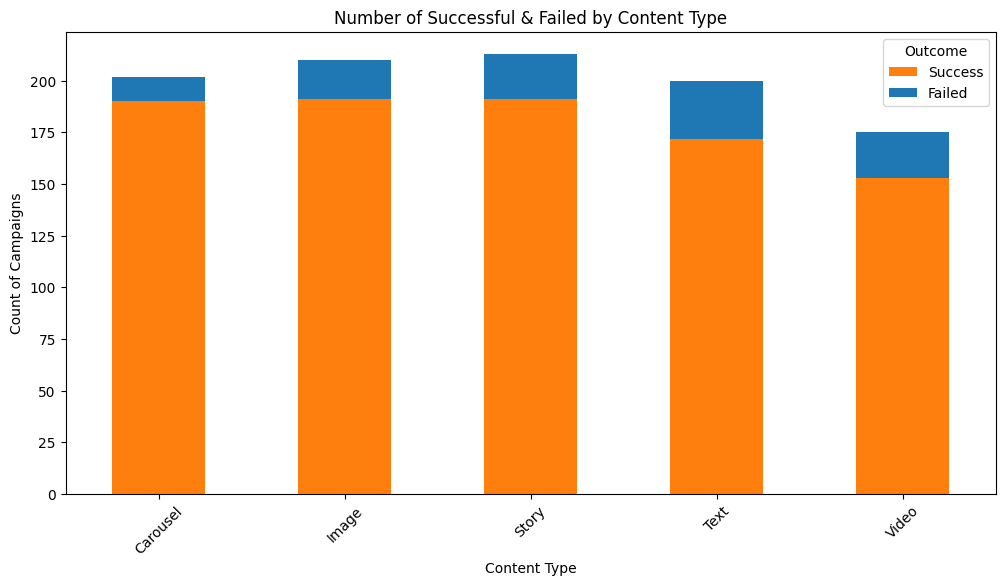

In [226]:
#The number of successful campaigns compared to the failed campaigns by the content type
content_data = df.groupby(["Content_Type", "Success"]).size().unstack().fillna(0)

content_data = content_data[[1,0]]

content_data.plot(kind="bar", stacked=True, figsize=(12, 6), color=["#ff7f0e", "#1f77b4"])
plt.xlabel("Content Type")
plt.xticks(rotation=45)
plt.ylabel("Count of Campaigns")
plt.title("Number of Successful & Failed by Content Type")

plt.legend(["Success", "Failed"], title="Outcome")


In [227]:
platforms_used = df['Platform'].value_counts()
print(platforms_used)

Platform
YouTube      226
LinkedIn     209
Instagram    202
Facebook     193
Google       170
Name: count, dtype: int64


In [228]:
succesful_platform = df.groupby('Platform')['Success'].agg(['sum', 'count', 'mean'])
succesful_platform['mean'] = succesful_platform['mean'] * 100
succesful_platform.columns = ['Successful', 'Total', 'Average']


succesful_platform

,Successful,Total,Average
Platform,,,
Facebook,177,193,91.709845
Google,158,170,92.941176
Instagram,175,202,86.633663
LinkedIn,188,209,89.952153
YouTube,199,226,88.053097


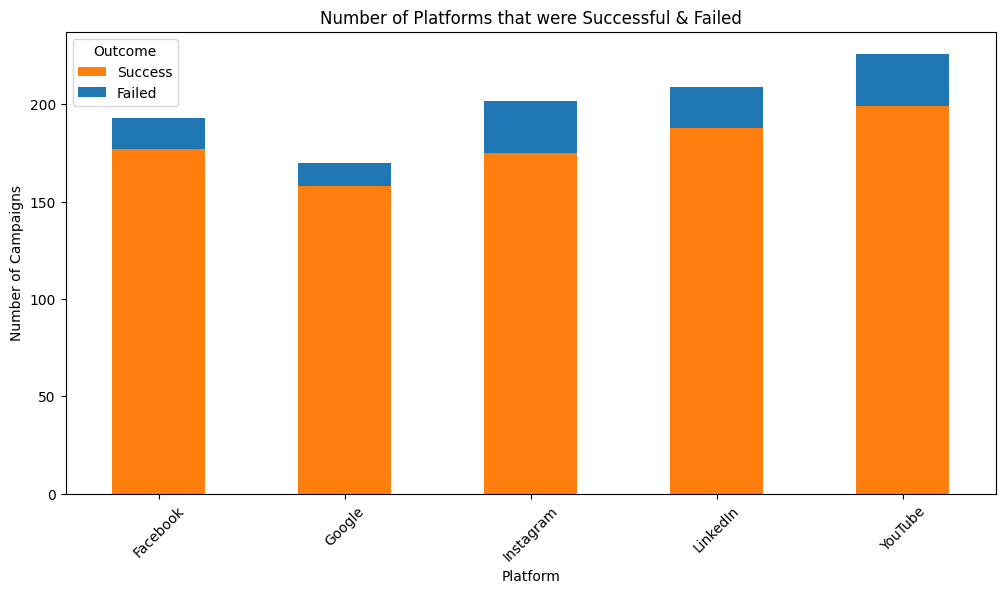

In [229]:
platform_data = df.groupby(['Platform', 'Success']).size().unstack().fillna(0)

platform_data = platform_data[[1, 0]]

platform_data.plot(kind='bar', figsize=(12, 6), stacked=True, color=['#ff7f0e', '#1f77b4'])
plt.title("Number of Platforms that were Successful & Failed")
plt.xlabel("Platform")
plt.ylabel("Number of Campaigns")
plt.xticks(rotation=45)
plt.legend(['Success', 'Failed'], title='Outcome')

plt.show()


In [230]:
ctr_platform = df.groupby('Platform')['CTR'].agg(['sum', 'count', 'mean'])
ctr_platform.columns = ['Sum', 'Total', 'Average']
ctr_platform

,Sum,Total,Average
Platform,,,
Facebook,96345.552617,193,499.199754
Google,57155.788141,170,336.210518
Instagram,89367.070047,202,442.411238
LinkedIn,67745.564370,209,324.141456
YouTube,78374.325845,226,346.789052


C:\Users\Anrie\AppData\Local\Temp\ipykernel_20176\2857967530.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Platform', y='CTR', data=df, palette="coolwarm")


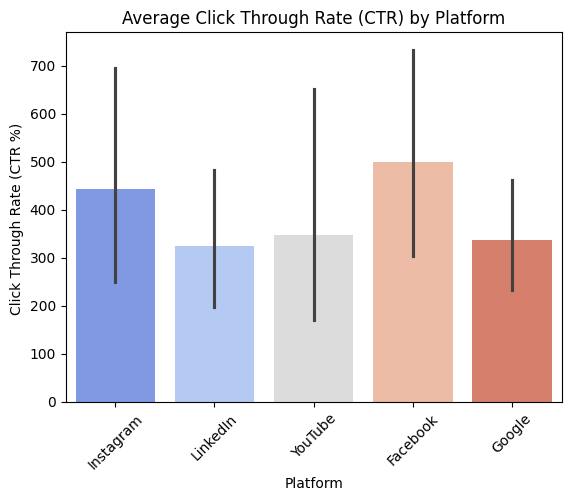

In [231]:
sns.barplot(x='Platform', y='CTR', data=df, palette="coolwarm")

plt.title("Average Click Through Rate (CTR) by Platform")
plt.xlabel("Platform")
plt.ylabel("Click Through Rate (CTR %) ")
plt.xticks(rotation=45)

plt.show()

In [232]:
conversion_rate_content_type = df.groupby('Content_Type')['Conversion_Rate'].agg(['sum', 'count', 'mean'])

conversion_rate_content_type.columns = ['Sum', 'Total', 'Average']

conversion_rate_content_type

,Sum,Total,Average
Content_Type,,,
Carousel,3105.123204,202,15.371897
Image,6567.992780,210,31.276156
Story,7327.026345,213,34.399185
Text,6658.912216,200,33.294561
Video,3197.930130,175,18.273886


C:\Users\Anrie\AppData\Local\Temp\ipykernel_20176\19678005.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Content_Type', y='Conversion_Rate', estimator=np.mean, data=df, palette='coolwarm')


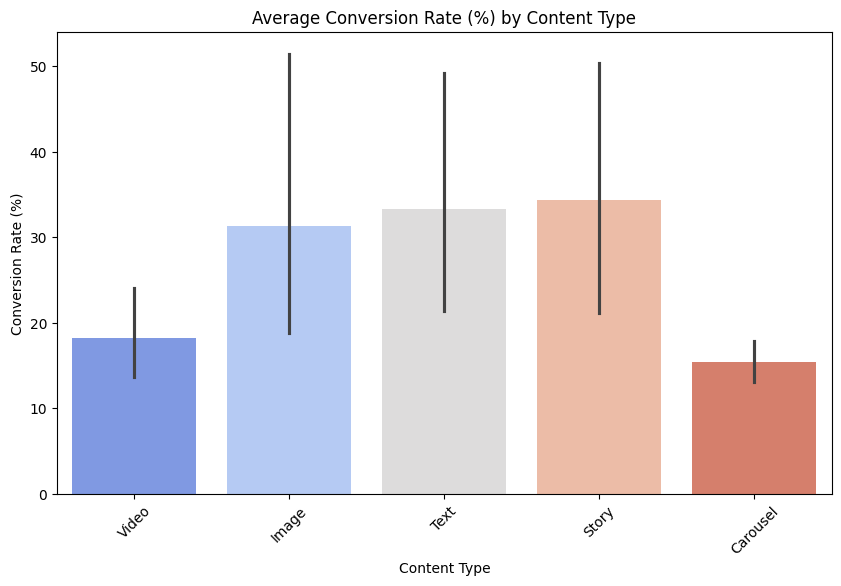

In [233]:
plt.figure(figsize=(10,6))

sns.barplot(x='Content_Type', y='Conversion_Rate', estimator=np.mean, data=df, palette='coolwarm')
plt.title("Average Conversion Rate (%) by Content Type")
plt.xlabel("Content Type")
plt.ylabel("Conversion Rate (%)")
plt.xticks(rotation=45)

plt.show()

In [292]:
platform_budget_grouped = df.groupby('Platform')['Budget'].agg(['max', 'min', 'mean', 'count', 'median', ('Q1', lambda x: np.percentile(x, 25)), 
                                                                ('Q3', lambda x:np.percentile(x, 75))]).round(4)
platform_budget_grouped

,max,min,mean,count,median,Q1,Q3
Platform,,,,,,,
Facebook,49911,109,23270.2539,193,23025.0,9917.00,36020.00
Google,49858,504,23823.6941,170,23334.0,8972.00,38606.00
Instagram,49826,261,25388.8564,202,24046.0,12267.00,39651.25
LinkedIn,49950,297,25289.7560,209,24044.0,13517.00,38618.00
YouTube,49923,155,24941.7876,226,24476.0,13287.75,37329.75


C:\Users\Anrie\AppData\Local\Temp\ipykernel_20176\1400855492.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Platform', y='Budget', data=df, palette=palette)


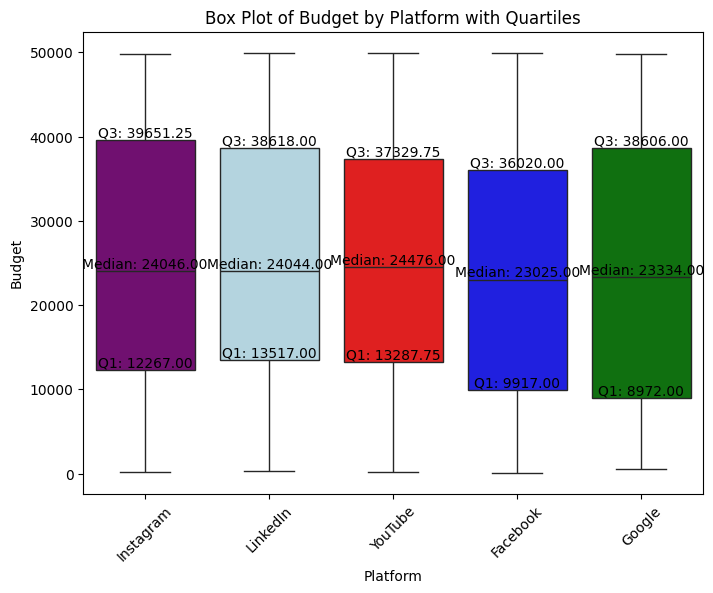

In [295]:
plt.figure(figsize=(8, 6))
palette = {'YouTube': 'red', 'Facebook': 'blue', 'Google': 'Green', 'LinkedIn': 'LightBlue', 'Instagram': 'Purple'}

sns.boxplot(x='Platform', y='Budget', data=df, palette=palette)

# Calculate quartiles for each platform and annotate
for platform in df['Platform'].unique():
    platform_data = df[df['Platform'] == platform]['Budget']
    q1 = np.percentile(platform_data, 25)
    median = np.percentile(platform_data, 50)
    q3 = np.percentile(platform_data, 75)
    
    # Add annotations
    plt.text(platform, q1, f'Q1: {q1:.2f}', horizontalalignment='center', verticalalignment='bottom', fontsize=10)
    plt.text(platform, median, f'Median: {median:.2f}', horizontalalignment='center', verticalalignment='bottom', fontsize=10)
    plt.text(platform, q3, f'Q3: {q3:.2f}', horizontalalignment='center', verticalalignment='bottom', fontsize=10)

plt.title('Box Plot of Budget by Platform with Quartiles')
plt.xlabel('Platform')
plt.ylabel('Budget')
plt.xticks(rotation=45)
plt.show()


C:\Users\Anrie\AppData\Local\Temp\ipykernel_20176\2292212294.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Platform', y='Budget', data=df, palette=palette)


Text(0, 0.5, 'Budget')

<Figure size 800x600 with 0 Axes>

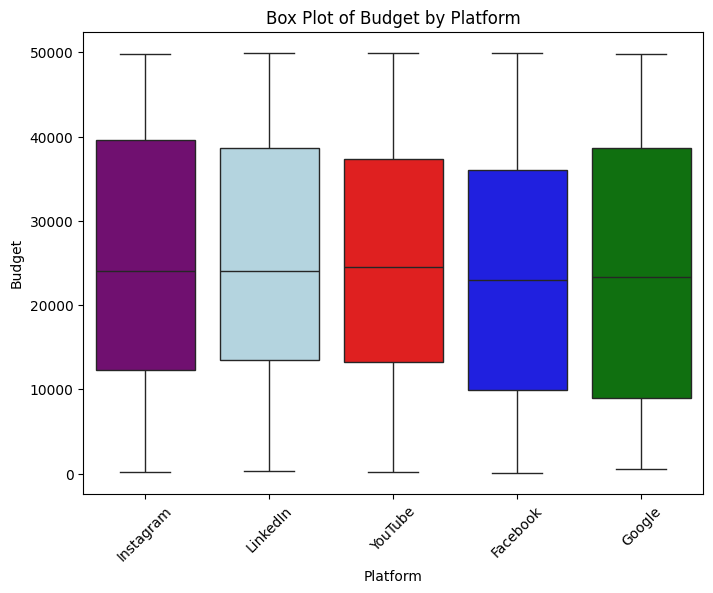

In [288]:
plt.figure(figsize=(8, 6))
palette = {'YouTube': 'red', 'Facebook': 'blue', 'Google': 'Green', 'LinkedIn': 'LightBlue', 'Instagram': 'Purple'}

plt.figure(figsize=(8, 6))
sns.boxplot(x='Platform', y='Budget', data=df, palette=palette)
plt.title('Box Plot of Budget by Platform')
plt.xlabel('Platform')
plt.xticks(rotation=45)
plt.ylabel('Budget')

In [234]:
target_age_succcess_grouped = df.groupby('Target_Age')['Success'].agg(['sum', 'count', 'mean']).round(4)

target_age_succcess_grouped.columns = ['Sum', 'Total', 'Average']
target_age_succcess_grouped = target_age_succcess_grouped.sort_values(by='Total', ascending=False)
target_age_succcess_grouped['Average'] = target_age_succcess_grouped['Average'] * 100


<Figure size 1200x600 with 0 Axes>

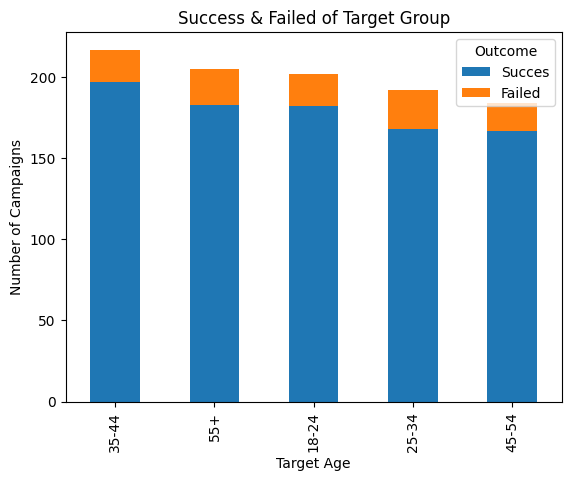

,Sum,Total,Average
Target_Age,,,
35-44,197,217,90.78
55+,183,205,89.27
18-24,182,202,90.10
25-34,168,192,87.50
45-54,167,184,90.76


In [263]:
succesful_target_age = df.groupby(['Target_Age', 'Success']).size().unstack().fillna(0)

succesful_target_age = succesful_target_age[[1, 0]]

succesful_target_age = succesful_target_age.sort_values(by=1, ascending=False)


plt.figure(figsize=(12, 6))
ax = succesful_target_age.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title("Success & Failed of Target Group")
plt.xlabel("Target Age")
plt.ylabel("Number of Campaigns")

plt.legend(['Succes', 'Failed'], title='Outcome')

plt.show()
    
target_age_succcess_grouped

In [264]:
ctr_budget_grouped = df.groupby(['CTR', 'Budget']).size().unstack().fillna(0)

chi2, p, dof, expected = stats.chi2_contingency(ctr_budget_grouped)

print(chi2)
print(p)

if p < 0.05:
    print("The difference is significant")
else:
    print("The difference is not signficant, evidence is not strong enough") 

990999.9999999995
0.2405580123154973
The difference is not signficant, evidence is not strong enough


In [265]:
budget_success_contingency = df.groupby(['Budget', 'Success']).size().unstack().fillna(0)

chi2, p, dof, expected = stats.chi2_contingency(budget_success_contingency)

print(chi2)
print(p)

if p < 0.05:
    print("The difference is significant")
else:
    print("The difference is not signficant, evidence is not strong enough") 

989.176434934139
0.5103746665912974
The difference is not signficant, evidence is not strong enough


In [266]:
from scipy import stats

# Assuming 'Success' is a binary column (0 for failed, 1 for success)
# Convert 'Budget' into categories (if it's not already categorical)
df['Budget_Category'] = pd.cut(df['Budget'], bins=[0, 1000, 5000, 10000, 20000], labels=['Low', 'Medium', 'High', 'Very High'])

# Run ANOVA to test if 'Budget' has an effect on 'Success'
f_stat, p_value = stats.f_oneway(
    df[df['Budget_Category'] == 'Low']['Success'],
    df[df['Budget_Category'] == 'Medium']['Success'],
    df[df['Budget_Category'] == 'High']['Success'],
    df[df['Budget_Category'] == 'Very High']['Success']
)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The difference is significant: Budget has an effect on Success.")
else:
    print("The difference is not significant: Budget does not have a significant effect on Success.")


F-statistic: 0.31167651083716963
P-value: 0.8169491058618306
The difference is not significant: Budget does not have a significant effect on Success.


In [267]:
# Pearson correlation between Budget and Success
correlation, p_value = stats.pearsonr(df['Budget'], df['Success'])

print(f"Pearson Correlation: {correlation}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant correlation between Budget and Success.")
else:
    print("There is no significant correlation between Budget and Success.")


Pearson Correlation: 0.017762923208947984
P-value: 0.574760267984765
There is no significant correlation between Budget and Success.
